In [67]:
import cv2
from IPython.display import display, Image
from PIL import Image as PILImage
import numpy as np
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [68]:
# File path of the TIFF image
tiff_file_path = './data/95167221.TIF'

# Read TIFF image using cv2
image = cv2.imread(tiff_file_path, cv2.IMREAD_UNCHANGED)

# Define the output file path
png_file_path = './data/op.png'

# Save the image as a PNG
cv2.imwrite(png_file_path, image)


True

In [69]:
# File path of the TIFF image
tiff_file_path = './data/95167221.TIF'

# Read TIFF image using cv2
image = cv2.imread(tiff_file_path, cv2.IMREAD_UNCHANGED)

# If the image is grayscale, convert it to RGB to display it correctly in Jupyter Notebook
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


# Get the dimensions of the image
height, width = image.shape[:2]

# Compute the height of each part
part_height = height // 3  # use integer division to get an integer result

# Divide the image into 3 equal parts
part1 = image[:part_height]
part2 = image[part_height:2*part_height]
part3 = image[2*part_height:]

# Convert each part to a PNG for display
_, encoded_image1 = cv2.imencode('.png', part1)
_, encoded_image2 = cv2.imencode('.png', part2)
_, encoded_image3 = cv2.imencode('.png', part3)

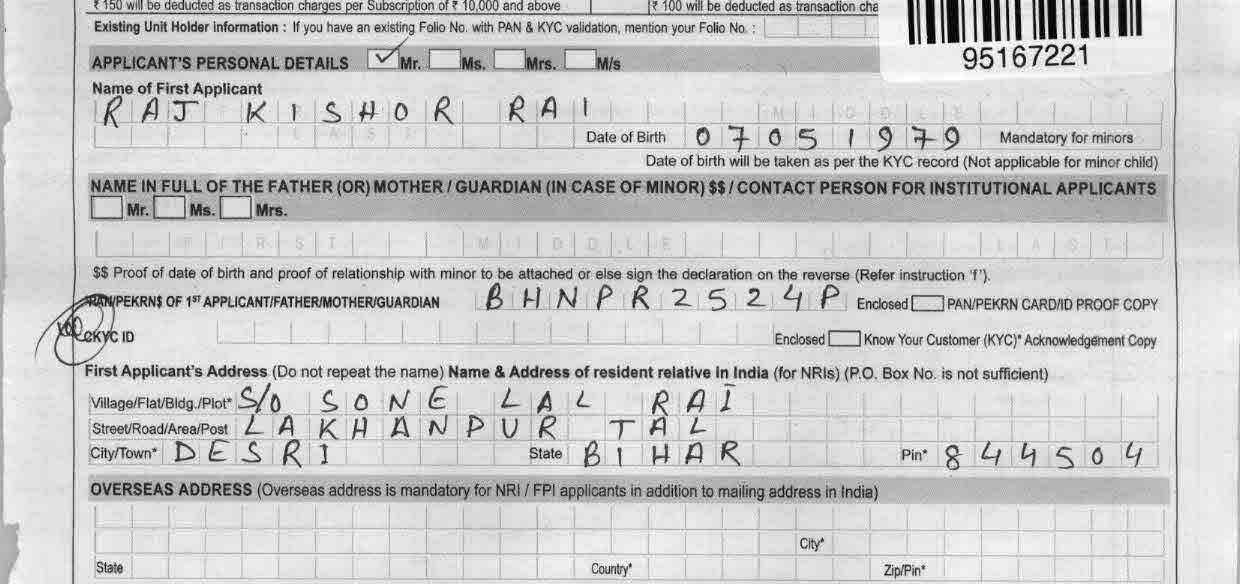

In [71]:
# Display the parts
display(Image(data=encoded_image2))

In [72]:
bounding_boxes = {'sl_no': (823, 12, 389, 146), 'advisor_info': (33, 154, 1182, 211), 'personal_details': (59, 30, 1144, 155), 'address_details': (5, 222, 1226, 286), 'payment_details': (13, 310, 1203, 269)}
image_field_mapping = {'part1':['sl_no', 'advisor_info'], 'part2':['personal_details', 'address_details'], 'part3': ['payment_details']}

In [75]:
field = 'personal_details'
x, y, w, h = bounding_boxes[field]
cropped_image = part2[y:y+h, x:x+w]

GIR TEE le SWE EE TT

APPLGANTS PERSONAL DETALS [har Joss. [bin 7221
Name of First Applicant
FAT Ki1s#0oR RA
Date of Birth 0} as | 9 +9 Mandatory for minors
Date of birth will be taken as per the KYC record {Not applicabi for minor child)




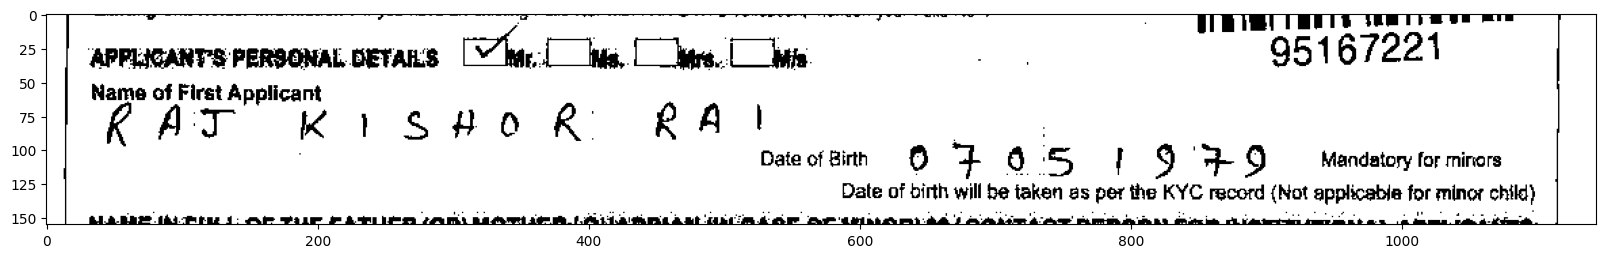

In [76]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image

def extract_text_from_image(cropped_image):
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, threshold_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply OCR to the threshold image
    custom_config = r'--oem 1 --psm 1'  
    text = pytesseract.image_to_string(threshold_image, config=custom_config)

    # Print the recognized text
    print(text)

    plt.figure(figsize=(20,10))
    # Display the final image
    plt.imshow(threshold_image, cmap='gray')
    plt.show()

# Now you can call the function with any cropped image
extract_text_from_image(cropped_image)
